In [1]:
import json 
import pandas as pd 
import jsonlines




In [2]:
file_path = "Digital_Music_5.json"



def parse(path):
    with open(file_path) as f:
        for line in f:
            yield eval(line)
        
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
df = getDF(file_path)


In [4]:
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A3EBHHCZO6V2A4,5555991584,"Amaranth ""music fan""","[3, 3]","It's hard to believe ""Memory of Trees"" came ou...",5.0,Enya's last great album,1158019200,"09 12, 2006"
1,AZPWAXJG9OJXV,5555991584,bethtexas,"[0, 0]","A clasically-styled and introverted album, Mem...",5.0,Enya at her most elegant,991526400,"06 3, 2001"
2,A38IRL0X2T4DPF,5555991584,bob turnley,"[2, 2]",I never thought Enya would reach the sublime h...,5.0,The best so far,1058140800,"07 14, 2003"
3,A22IK3I6U76GX0,5555991584,Calle,"[1, 1]",This is the third review of an irish album I w...,5.0,Ireland produces good music.,957312000,"05 3, 2000"
4,A1AISPOIIHTHXX,5555991584,"Cloud ""...""","[1, 1]","Enya, despite being a successful recording art...",4.0,4.5; music to dream to,1200528000,"01 17, 2008"


In [5]:
df.loc[(df['overall'] == 1.0) | (df['overall'] == 2.0), 'overall'] = 'negative'

In [6]:
df.loc[(df['overall'] == 4.0) | (df['overall'] == 5.0), 'overall'] = 'positive'

In [7]:
df.loc[(df['overall'] == 3.0), 'overall'] = 'neutral'

In [8]:
df['overall'].head()

0    positive
1    positive
2    positive
3    positive
4    positive
Name: overall, dtype: object

In [9]:
overall_s = df['overall'].value_counts()
overall_s

positive    52116
neutral      6789
negative     5801
Name: overall, dtype: int64

In [37]:
# checking % from total positive, neutral, negative
%matplotlib notebook
import matplotlib.pyplot as plt

# overall_s.plot.pie(autopct='%1.1f%%')

In [11]:
df_negative_neutral = df[(df['overall']=='negative')| (df['overall']=='neutral')]

In [12]:
df_negative_neutral

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
6,A3O90G1D7I5EGG,5555991584,dev1,"[1, 5]",Enya is one of a few artists whom I consider s...,neutral,Have You Hugged A Tree Today?,959385600,"05 27, 2000"
28,A1L8IB1K8ETJW9,B0000000ZW,bgflynn,"[2, 2]",Some tracks on this CD are really great! Of c...,neutral,A Good album,996278400,"07 28, 2001"
30,A1X93ES4DITTWK,B0000000ZW,Blueberry Muffin,"[2, 9]","In high school ""Stroke You Up"" was the jam, so...",negative,Wack in '94. . .Still Wack in `06,1146182400,"04 28, 2006"
31,A1JXEJFPV9EUVS,B0000000ZW,DJK30,"[0, 1]",This cd was pretty good when it came out. The ...,neutral,"""Can I stroke you up!""",1226793600,"11 16, 2008"
33,A3QZA3MXC75V4E,B0000000ZW,"J. Suh ""Hang-Tyme""","[1, 2]",This album was released during an era where sl...,neutral,"Keep it slow, ladies...",1172620800,"02 28, 2007"
50,A10I9Y44HCRPG,B00000016T,H. Rogers,"[2, 22]",cOMEON- AN ALBUMthis GREAT-no one is going to ...,negative,SERIOUSLY????,1276905600,"06 19, 2010"
86,A22N9H8V0RYQR3,B00000016W,A fair and Balanced Rater,"[4, 29]",I never understood what's the BIG deal behind ...,negative,Overrated HYPE,1125273600,"08 29, 2005"
94,A33L1SEOXFGL44,B00000016W,Ashra,"[19, 24]",It's now very well known that the labelling on...,negative,Not FROM THE ORIGINAL MASTERS!,1240963200,"04 29, 2009"
95,AH1KJ45IQTM4T,B00000016W,Benjamin,"[18, 73]",I am very disapointed! After looking for this ...,negative,Masterpiece?,1069977600,"11 28, 2003"
104,A38IRL0X2T4DPF,B00000016W,bob turnley,"[13, 32]",What is the big deal? Wouldn't it be nice and ...,neutral,ohmygod! it's Pet Sounds. wuptifreakin'do,1141603200,"03 6, 2006"


In [13]:
# for index, row in df.iterrows():
#     if row['overall'] == 'positive' and index%2 == 0:
#         df.drop(index,inplace=True)
file_path = "Musical_Instruments_5.json"
df_music = getDF(file_path)

In [14]:
df_music.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [15]:
df_music.loc[(df_music['overall'] == 1.0) | (df_music['overall'] == 2.0), 'overall'] = 'negative'
df_music.loc[(df_music['overall'] == 4.0) | (df_music['overall'] == 5.0), 'overall'] = 'positive'
df_music.loc[(df_music['overall'] == 3.0), 'overall'] = 'neutral'

In [16]:
overall_music_count = df_music['overall'].value_counts()
overall_music_count

positive    9022
neutral      772
negative     467
Name: overall, dtype: int64

In [17]:
united_df = pd.concat([df_music, df_negative_neutral])

In [18]:
united_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",positive,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,positive,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,positive,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,positive,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,positive,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [19]:
united_df['overall'].value_counts()

positive    9022
neutral     7561
negative    6268
Name: overall, dtype: int64

In [20]:
df_NLP = united_df[["reviewText", "overall"]]

In [21]:
df_NLP = df_NLP.rename(columns={"overall":"Class"})
df_NLP.head()

,reviewText,Class
0,"Not much to write about here, but it does exac...",positive
1,The product does exactly as it should and is q...,positive
2,The primary job of this device is to block the...,positive
3,Nice windscreen protects my MXL mic and preven...,positive
4,This pop filter is great. It looks and perform...,positive


In [22]:
df_NLP.columns

Index(['reviewText', 'Class'], dtype='object')

In [35]:
overall_s = df_NLP['Class'].value_counts()

<IPython.core.display.Javascript object>


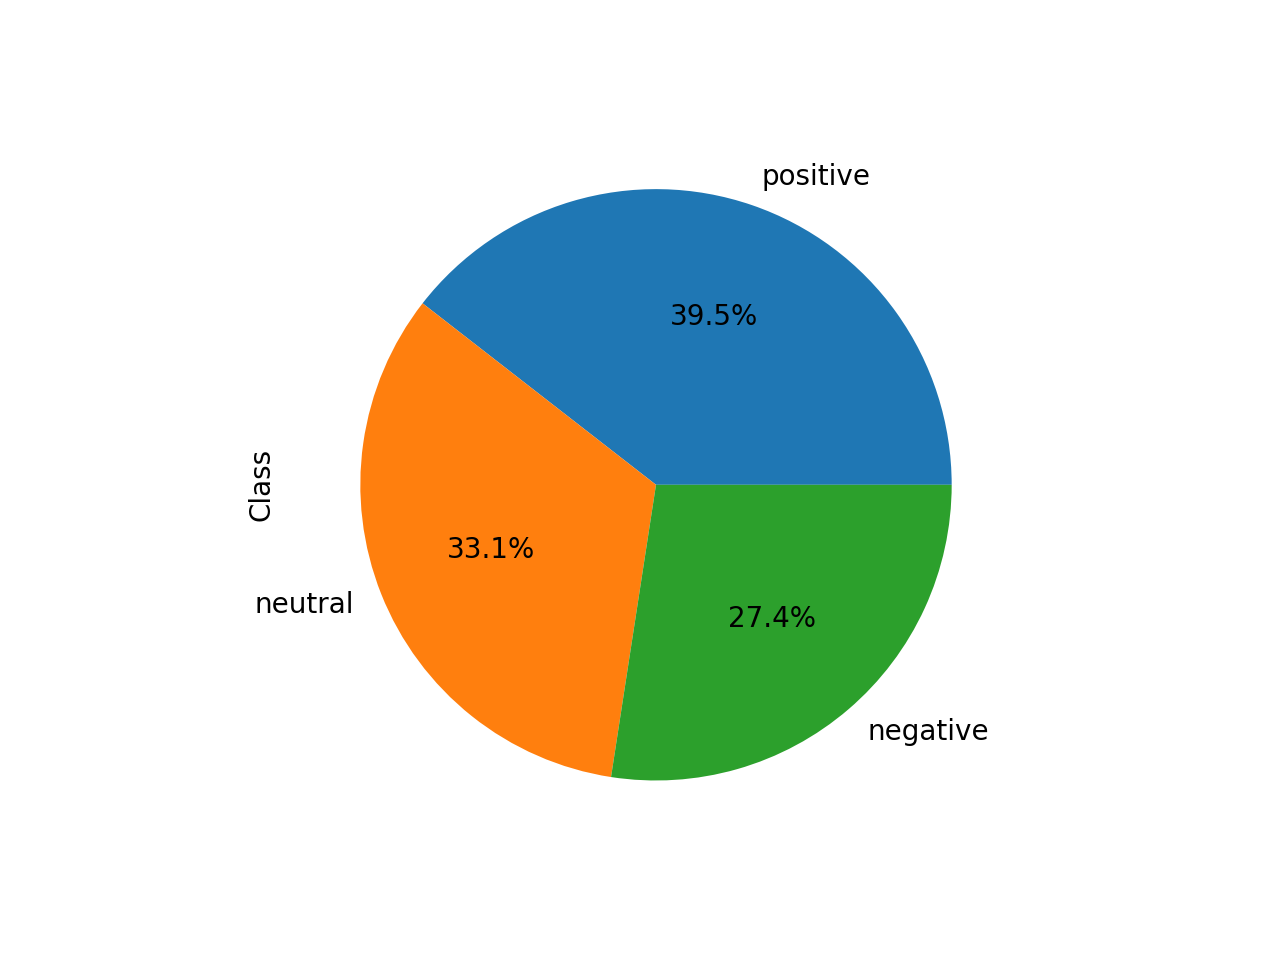

In [38]:
overall_s.plot.pie(autopct='%1.1f%%')

In [23]:
df_NLP.to_csv('united_csv', index=False)

In [24]:
from sklearn.model_selection import train_test_split
data_train, data_test, y_train, y_test = train_test_split(df_NLP.reviewText, df_NLP.Class, 
                                                          test_size = 0.20, random_state = 12)

In [25]:
# from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
%pprint
import nltk

Pretty printing has been turned OFF


In [27]:
# review_vzer = CountVectorizer(min_df=2, tokenizer=nltk.word_tokenize)
review_vzer = TfidfVectorizer(max_features=45000, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))

In [28]:
data_train_tfidf = review_vzer.fit_transform(data_train)

In [29]:
import joblib
joblib.dump(review_vzer, 'vectorizer_NB.pkl')

NameError: name 'joblib' is not defined

In [30]:
data_train_tfidf.shape

(18280, 45000)

In [ ]:
# # Convert raw frequency counts into TF-IDF (Term Frequency -- Inverse Document Frequency) values
# from sklearn.feature_extraction.text import TfidfTransformer
# reviewTfmer = TfidfTransformer()

# # Again, fit and transform
# data_train_tfidf = reviewTfmer.fit_transform(data_train_counts)


In [89]:
# data_train_tfidf.shape

In [31]:
# Using the fitted vectorizer and transformer, tranform the test data
data_test_tfidf = review_vzer.transform(data_test)
# data_test_tfidf = reviewTfmer.transform(data_test_counts)

In [32]:
from sklearn.naive_bayes import MultinomialNB
# Train a Multimoda Naive Bayes classifier. Again, we call it "fitting"
NB_model = MultinomialNB()
NB_model.fit(data_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
import joblib
joblib.dump(NB_model, 'NB_model.pkl')

['NB_model.pkl']

In [33]:
from sklearn.metrics import accuracy_score
y_prediction = NB_model.predict(data_test_tfidf)
accuracy_score(y_test, y_prediction)

0.7656967840735069

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_prediction))
print(accuracy_score(y_test, y_prediction))

              precision    recall  f1-score   support

    negative       0.86      0.34      0.49      1239
     neutral       0.63      0.84      0.72      1474
    positive       0.87      0.99      0.93      1858

    accuracy                           0.77      4571
   macro avg       0.79      0.72      0.71      4571
weighted avg       0.79      0.77      0.74      4571

0.7656967840735069


In [100]:
new_reviews = ["this product is very good, excellent sounds, absolutly adorable",
              "bad, never think about to buy this product, waste of money"]
# 'bad, never think about to buy this product, waste of money'

In [101]:
vzer = open('vectorizer_NB.pkl','rb')
review_vzer = joblib.load(vzer)

In [102]:
# new_reviews_counts = review_vzer.transform(new_reviews)         # turn text into count vector
new_reviews_tfidf = review_vzer.transform(new_reviews)  # turn into tfidf vector

In [103]:
# pred = NB_model.predict(new_reviews_tfidf)
NB_spam_model = open('NB_model.pkl','rb')
clf = joblib.load(NB_spam_model)
pred = clf.predict(new_reviews_tfidf)

In [104]:
for review, category in zip(new_reviews, pred):
    print('%r => %s' % (review, category))

'this product is very good, excellent sounds, absolutly adorable' => positive
'bad, never think about to buy this product, waste of money' => negative
